### <span style="color:red">Importing Libraries</span> 

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set(color_codes=True)
plt.style.use('seaborn')
from pylab import rcParams  # for plotting box plot, to check outliers

#model developemnt libraries
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

### <span style="color:red">Reading file</span>

In [15]:
df = pd.read_csv('winequality-red.csv')

### <span style="color:red">Getting overview of features and type of data present in features using head() and tail()</span>  

In [17]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [18]:
df.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


###  <span style="color:red">Checking shape of data</span>

In [21]:
print(f'Number of rows and columns in data set are {df.shape}')

Number of rows and columns in data set are (1599, 12)


### <span style="color:red">Checking Null Values count and data type of features in whole data set</span>

In [19]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### <span style="color:green">From above results, it is clear that, there are no null values in data set</span>

### <span style="color:red">Checking data type of features</span>

In [24]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

### <span style="color:green">We have continuous data in all features.</span>

### <span style="color:red">Checking total Qualities/ranks present for feature name "quality"</span>

In [32]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

### <span style="color:green">We have to divide quality of wine into two groups as good (3,4,5) or bad (6,7,8). This leads us to bi-variate classification analysis.</span>


# <span style="color:red">Data Visualization</span>

### <span style="color:red">Checking relation of numerical data with each other, i.e. checking correlation matrix and plotting heat map</span>

<AxesSubplot:>

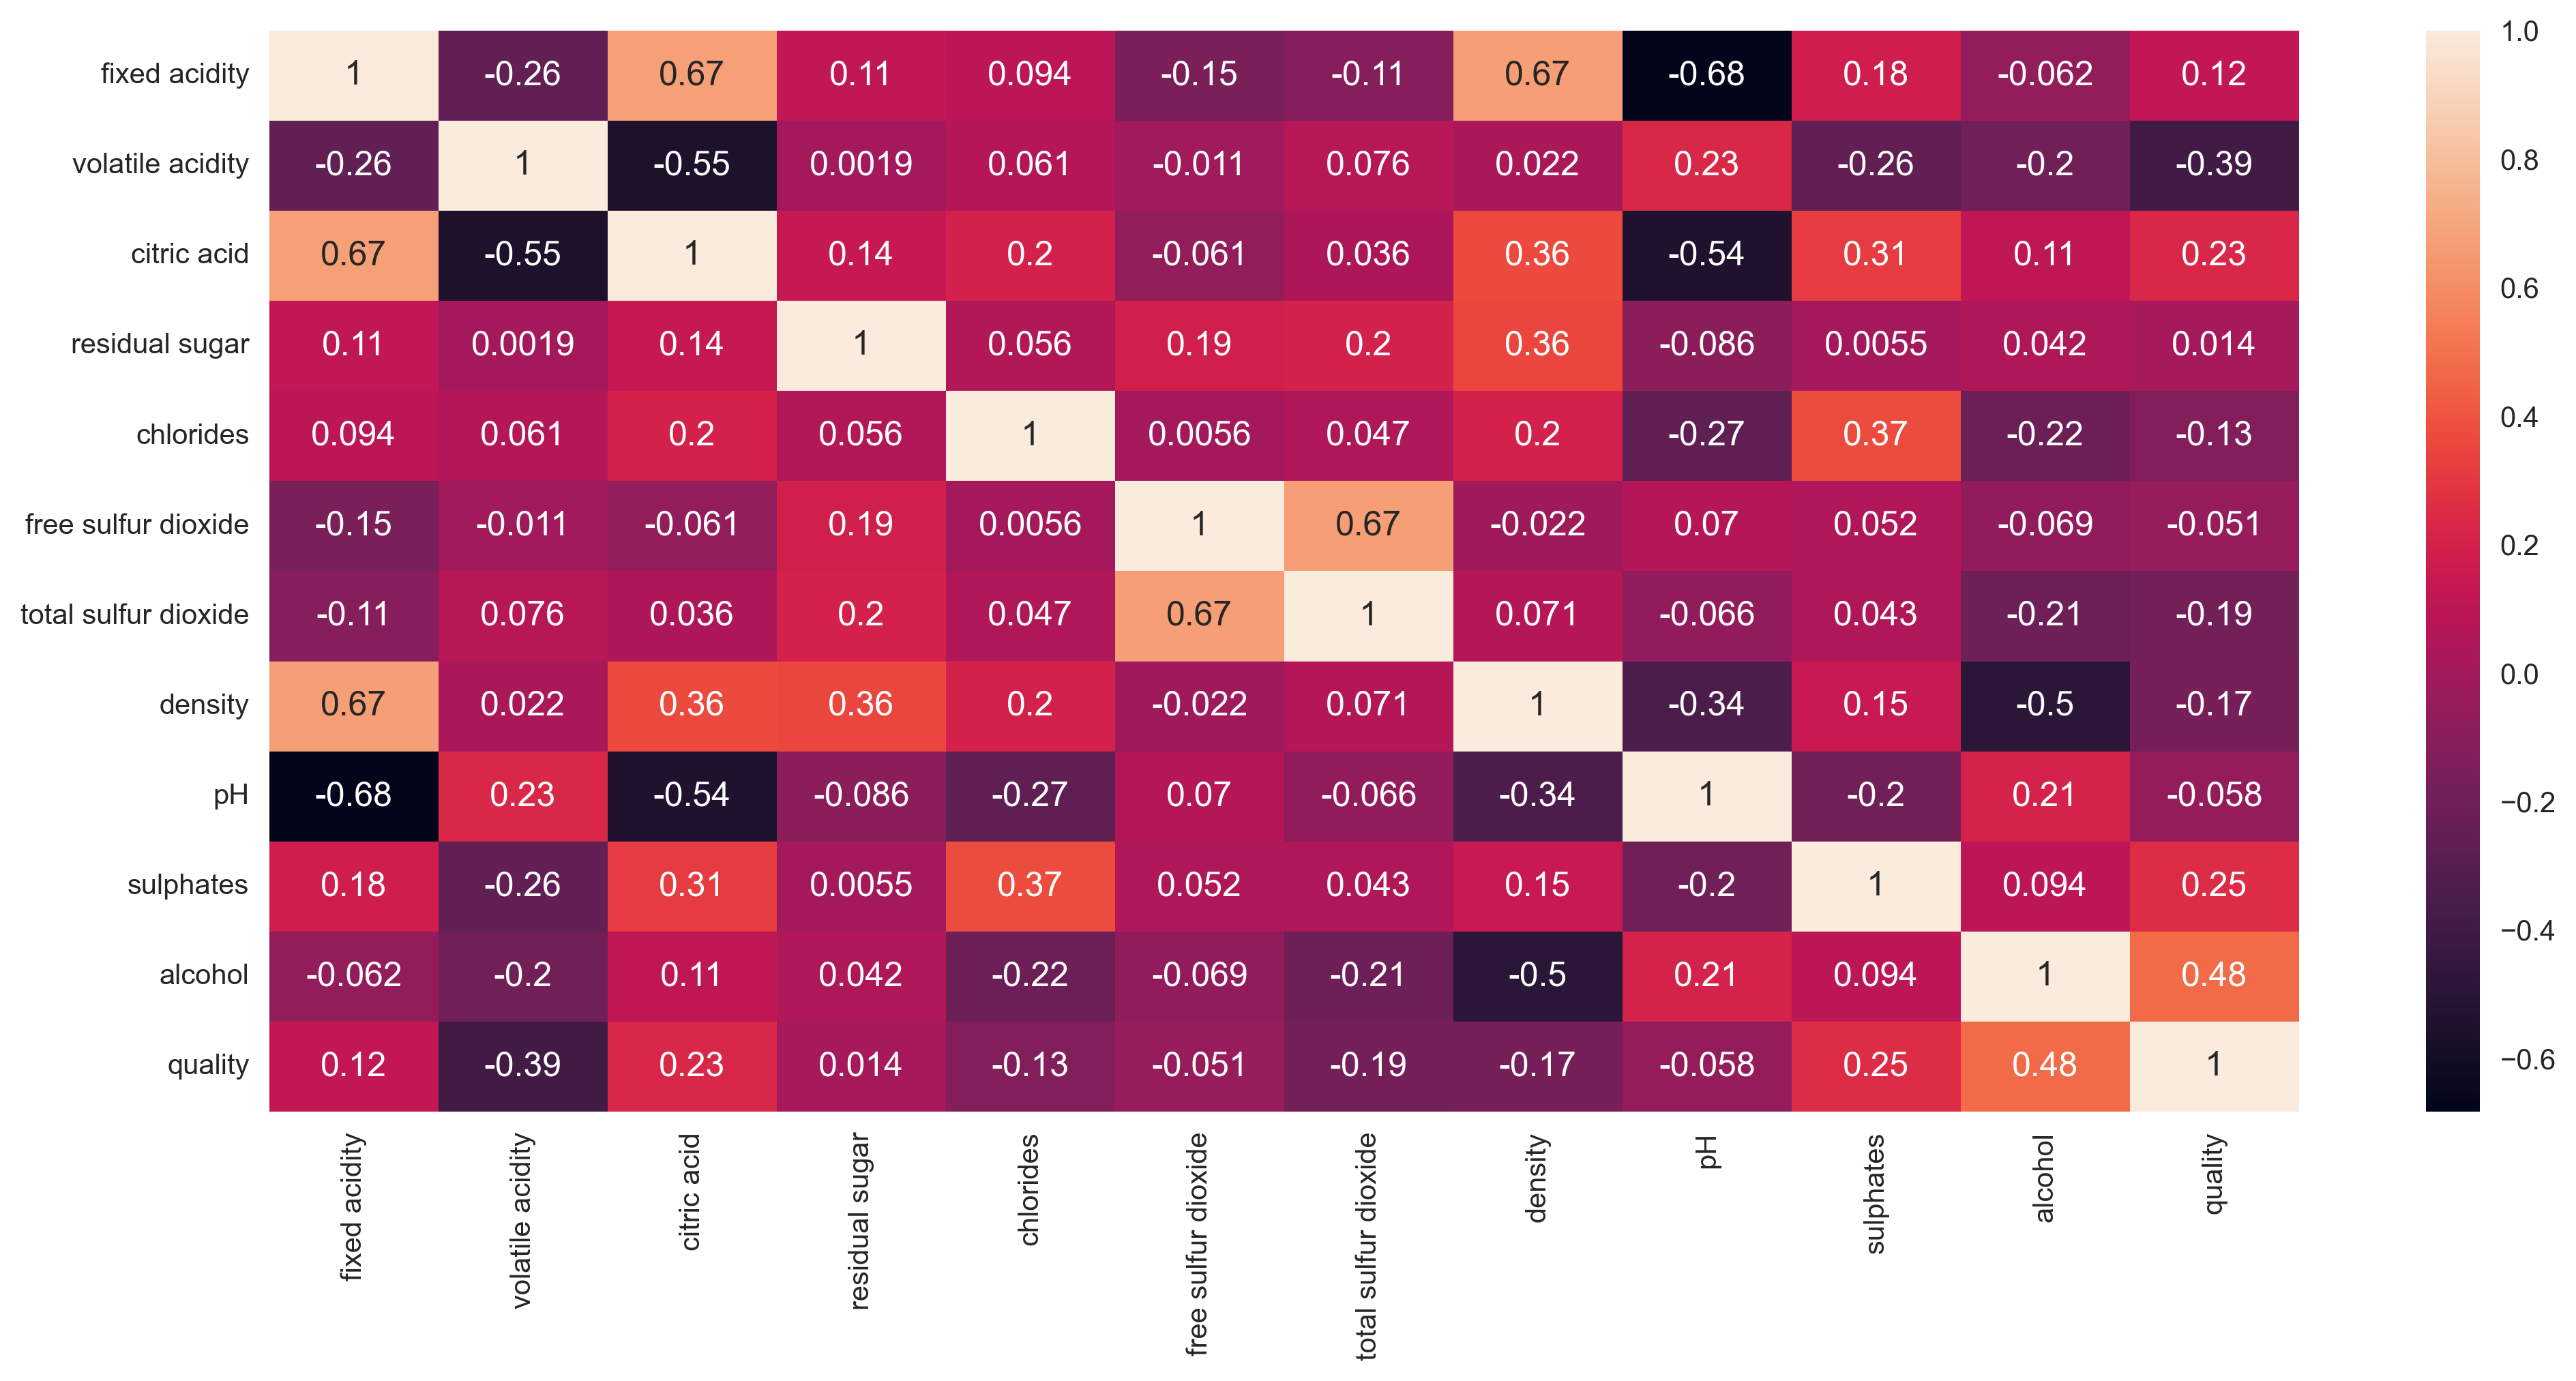

In [101]:
plt.figure(figsize=(16, 7), dpi=300)
sns.heatmap(df.corr(), annot=True)

### <span style="color:green">Positive Correlation - citric acid, sulphates, alcohol and somewhat fixed acidity</span>

### <span style="color:green">Negative Correleation - volatile acidity, total sulpher dioxide, density</span>

### <span style="color:red">Checking the effect of acidity in the qualities of wine</span>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


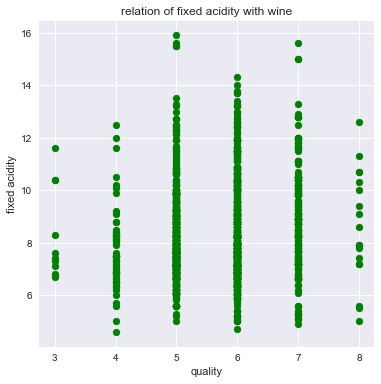

In [69]:
plt.figure(figsize=(6, 6))
plt.scatter(df['quality'], df['fixed acidity'], color = 'green')
plt.title('relation of fixed acidity with wine')
plt.xlabel('quality')
plt.ylabel('fixed acidity')
plt.legend()
plt.show()

### <span style="color:red">Checking the effect of alcohol in the qualities of wine</span>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


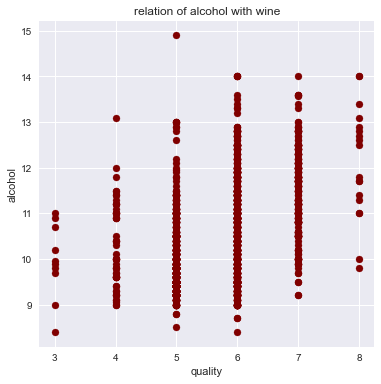

In [82]:
plt.figure(figsize=(6, 6))
plt.scatter(df['quality'], df['alcohol'], color = 'maroon')
plt.title('relation of alcohol with wine')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.legend()
plt.show()

### <span style="color:red">Checking the effect of volatile acidity in the qualities of wine</span>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


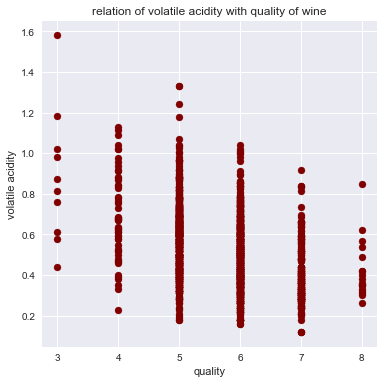

In [79]:
plt.figure(figsize=(6, 6))
plt.scatter(df['quality'], df['volatile acidity'], color = 'maroon')
plt.title('relation of volatile acidity with quality of wine')
plt.xlabel('quality')
plt.ylabel('volatile acidity')
plt.legend()
plt.show()

### <span style="color:red">Checking the effect of residual sugar in the quality of wine</span>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


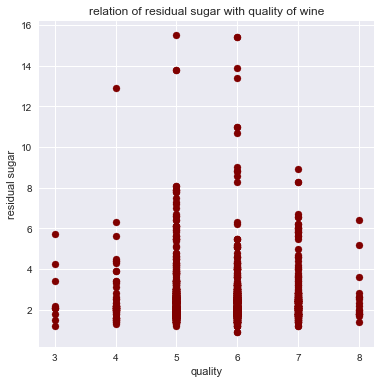

In [83]:
plt.figure(figsize=(6, 6))
plt.scatter(df['quality'], df['residual sugar'], color = 'maroon')
plt.title('relation of residual sugar with quality of wine')
plt.xlabel('quality')
plt.ylabel('residual sugar')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


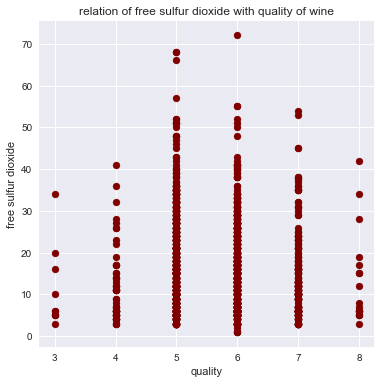

In [84]:
plt.figure(figsize=(6, 6))
plt.scatter(df['quality'], df['free sulfur dioxide'], color = 'maroon')
plt.title('relation of free sulfur dioxide with quality of wine')
plt.xlabel('quality')
plt.ylabel('free sulfur dioxide')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


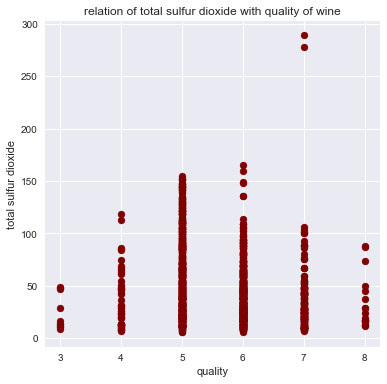

In [85]:
plt.figure(figsize=(6, 6))
plt.scatter(df['quality'], df['total sulfur dioxide'], color = 'maroon')
plt.title('relation of total sulfur dioxide with quality of wine')
plt.xlabel('quality')
plt.ylabel('total sulfur dioxide')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


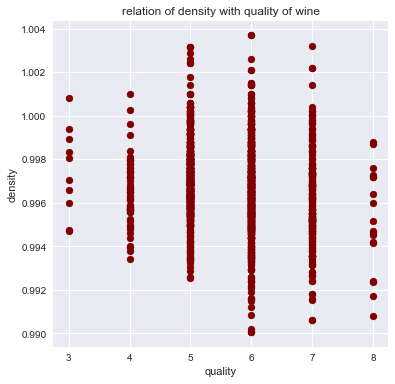

In [86]:
plt.figure(figsize=(6, 6))
plt.scatter(df['quality'], df['density'], color = 'maroon')
plt.title('relation of density with quality of wine')
plt.xlabel('quality')
plt.ylabel('density')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


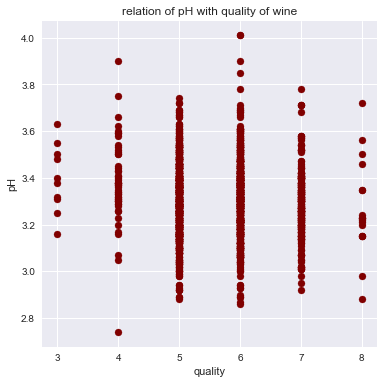

In [87]:
plt.figure(figsize=(6, 6))
plt.scatter(df['quality'], df['pH'], color = 'maroon')
plt.title('relation of pH with quality of wine')
plt.xlabel('quality')
plt.ylabel('pH')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


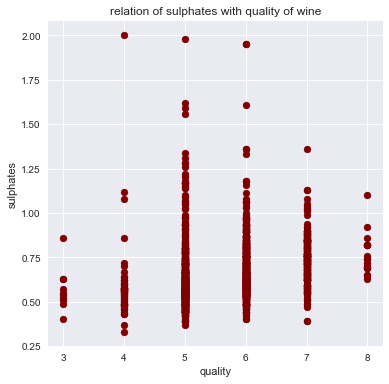

In [88]:
plt.figure(figsize=(6, 6))
plt.scatter(df['quality'], df['sulphates'], color = 'maroon')
plt.title('relation of sulphates with quality of wine')
plt.xlabel('quality')
plt.ylabel('sulphates')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


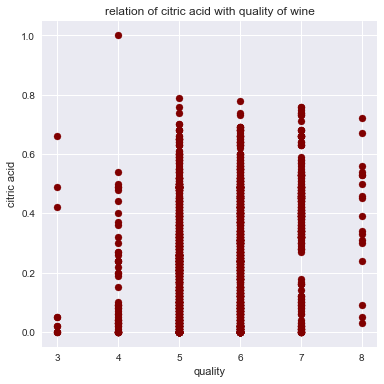

In [91]:
plt.figure(figsize=(6, 6))
plt.scatter(df['quality'], df['citric acid'], color = 'maroon')
plt.title('relation of citric acid with quality of wine')
plt.xlabel('quality')
plt.ylabel('citric acid')
plt.legend()
plt.show()

<AxesSubplot:>

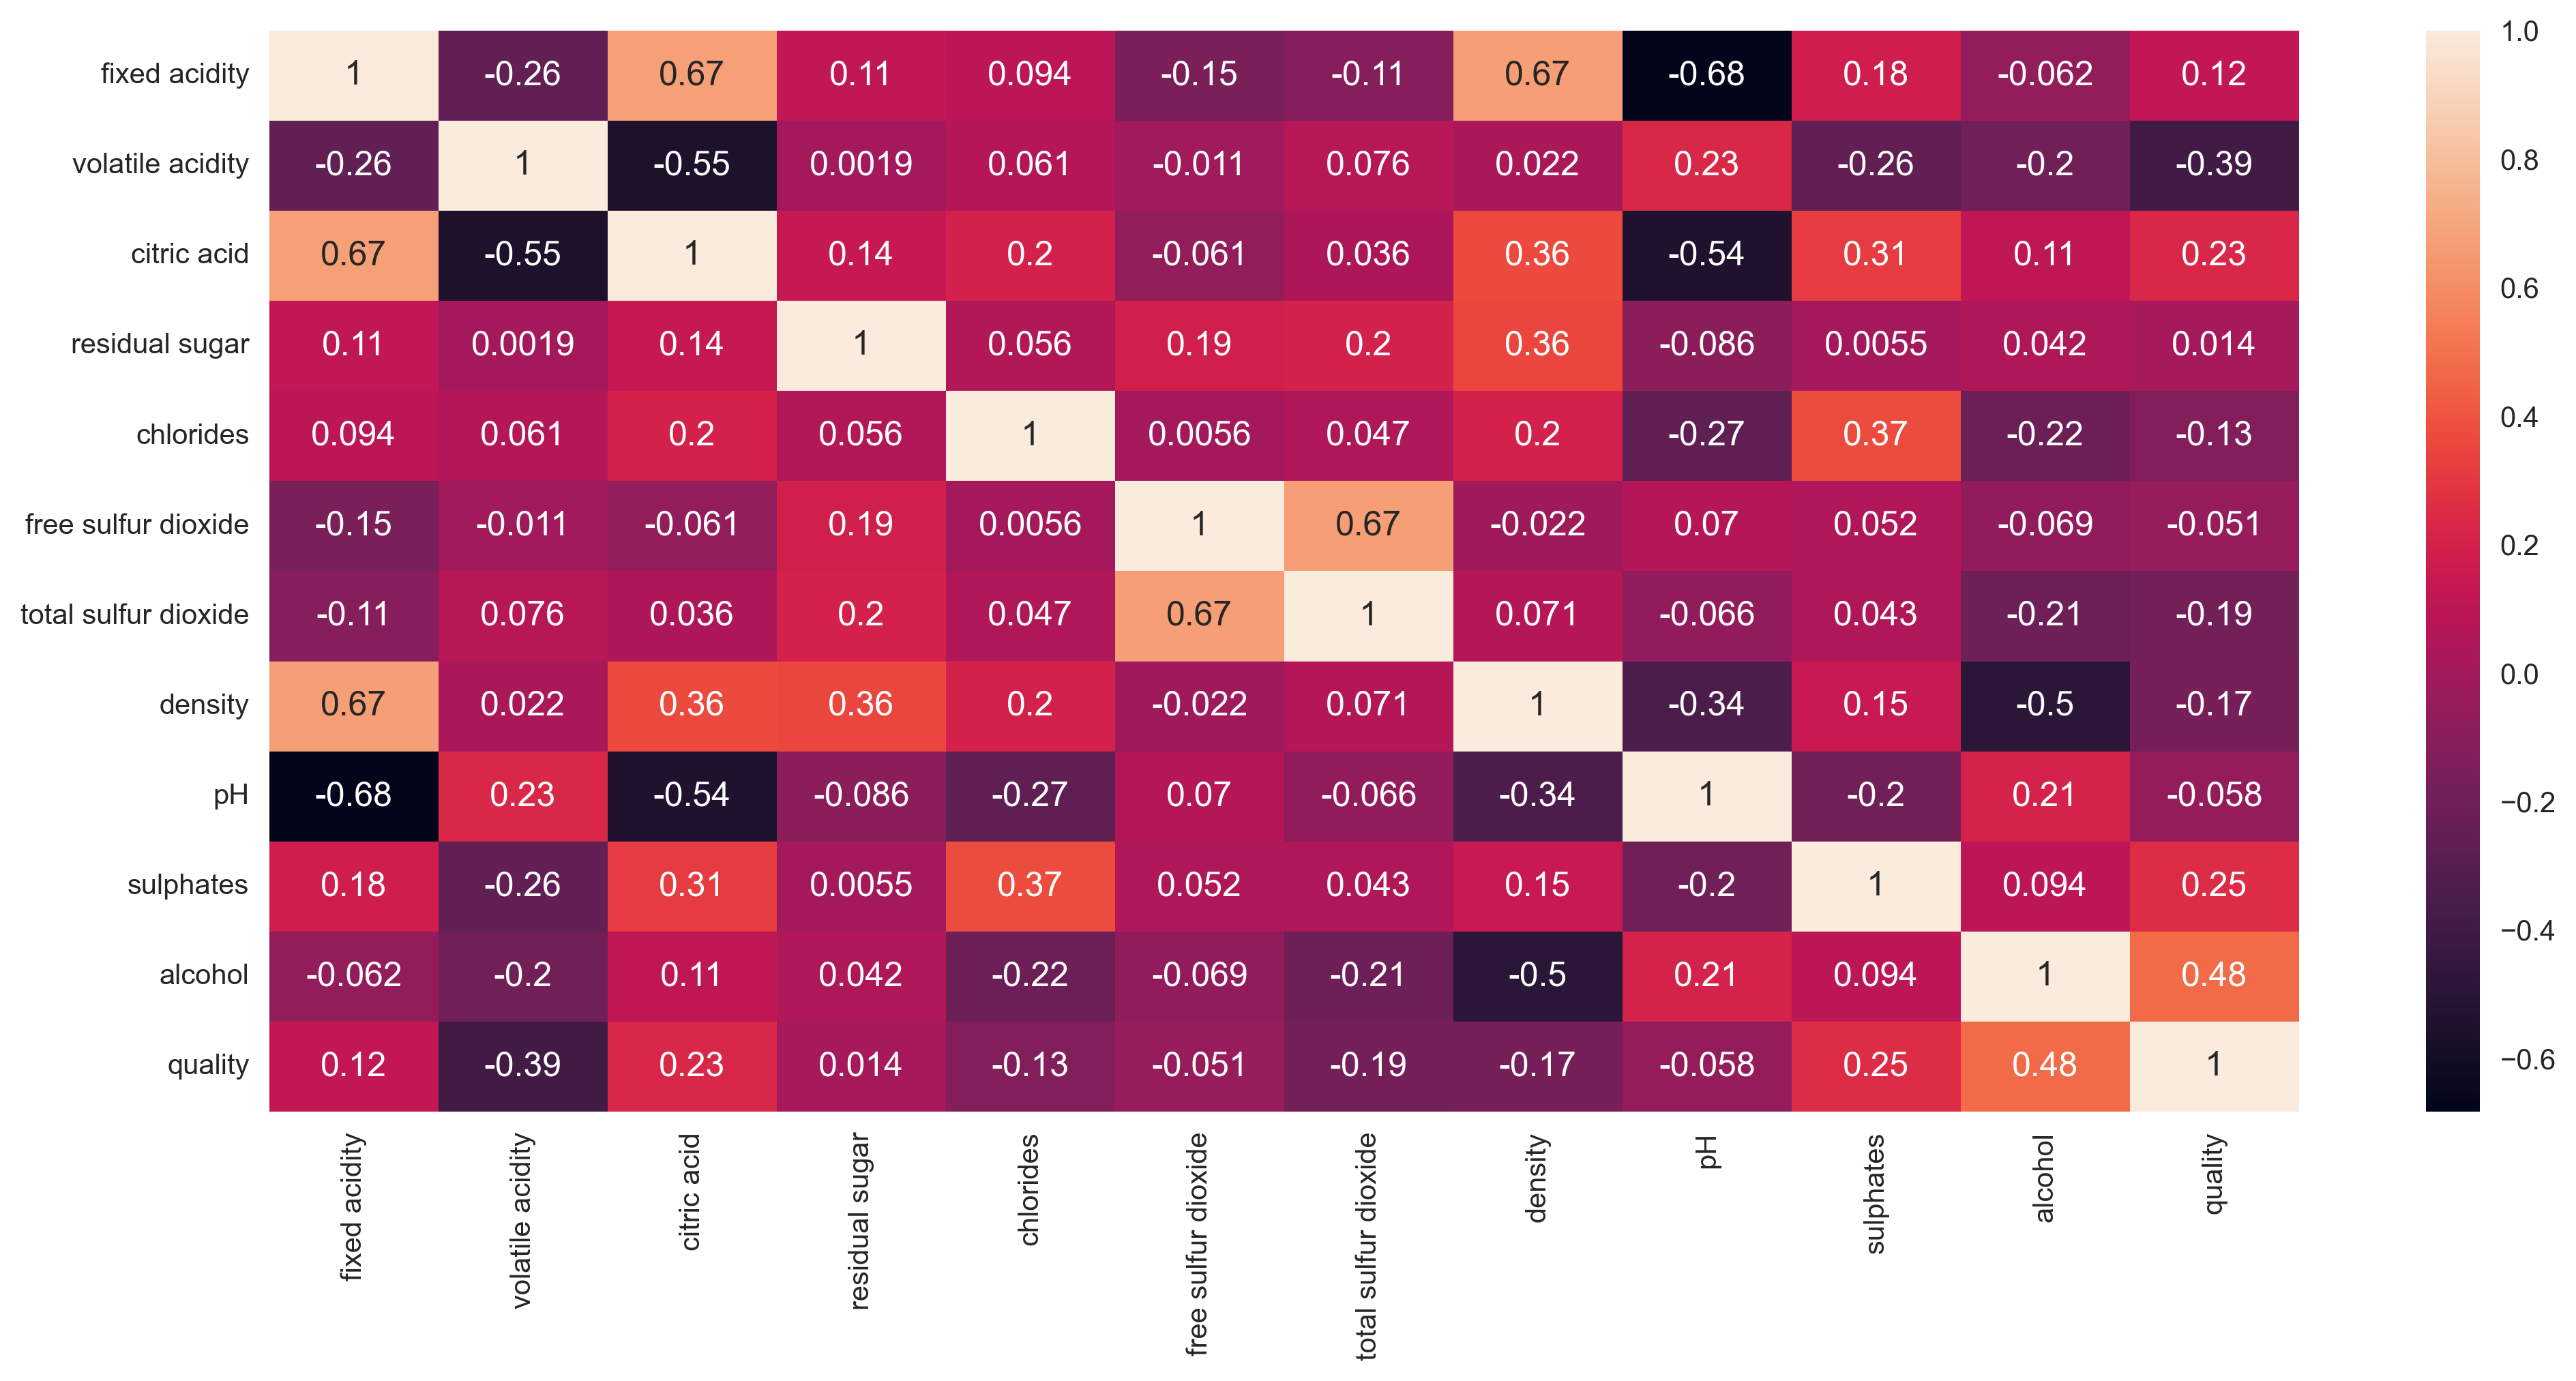

In [71]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# 


In [39]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# <span style="color:red">Checking Outliers</span>

<AxesSubplot:>

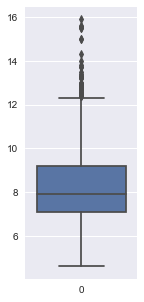

In [30]:
rcParams['figure.figsize'] = 2, 5
sns.boxplot(data = df['fixed acidity'])